In [1]:
import numpy as np 
import pandas as pd 
import seaborn
import matplotlib.pyplot as mplot
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [7]:
labelEncoder = LabelEncoder()
for column in data.columns:
    data[column] = labelEncoder.fit_transform(data[column])

In [8]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [10]:
data = data.drop(["veil-type"],axis=1)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [11]:
x = data.iloc[:,1:22]
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [12]:
y = data.iloc[:,0]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [13]:
scaler = StandardScaler()

In [14]:
x = scaler.fit_transform(x);
x[0:5]

array([[ 1.02971224,  0.14012794, -0.19824983,  1.18591657,  0.88193766,
         0.16289645, -0.43886364,  1.49468272, -0.22899776, -1.14480575,
         1.78146019,  0.68377765,  0.58638466,  0.62244139,  0.63199138,
         0.14203663, -0.25613174,  0.94808086, -0.67019486, -0.5143892 ,
         2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407,  1.18591657, -1.97031615,
         0.16289645, -0.43886364, -0.66903831, -0.22899776, -1.14480575,
         0.83898933,  0.68377765,  0.58638466,  0.62244139,  0.63199138,
         0.14203663, -0.25613174,  0.94808086, -0.2504706 , -1.31310821,
        -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929,  1.18591657, -0.54418924,
         0.16289645, -0.43886364, -0.66903831,  0.05347685, -1.14480575,
         0.83898933,  0.68377765,  0.58638466,  0.62244139,  0.63199138,
         0.14203663, -0.25613174,  0.94808086, -0.2504706 , -1.31310821,
         0.86714922],
       [ 1.02971224,  0.95327039,  1.37304929,  1.18591657

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [16]:
best_n_neighbors = 0
best_accuracy = 0
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(x_train,y_train)
    if model.score(x_test, y_test) > best_accuracy:
        best_accuracy = model.score(x_train, y_train)
        best_n_neighbors = i
        
print("Best n_neighbors Value: {}".format(best_n_neighbors))
print("Best Test Accuracy: {}%".format(round(best_accuracy*100,2)))

Best n_neighbors Value: 1
Best Test Accuracy: 100.0%


In [17]:
pred = model.predict(x_test)
report = classification_report(y_test,pred)
print("KNN Classifier report: \n\n",report )

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



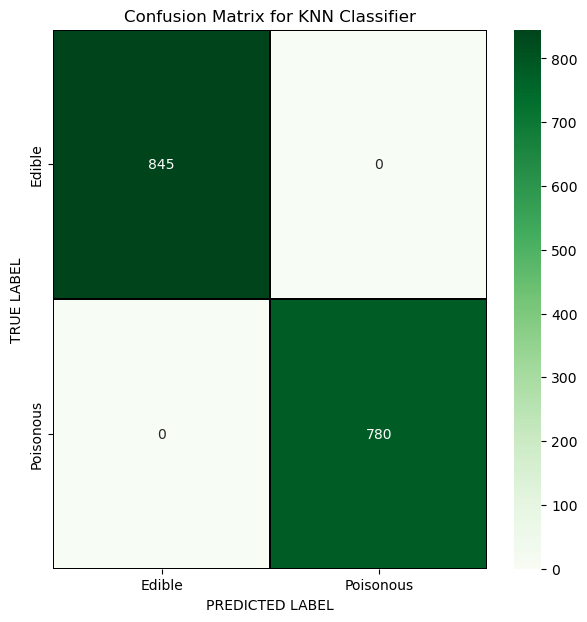

In [18]:
confusionMatrix = confusion_matrix(y_test,pred)
x_labels = ["Edible", "Poisonous"]
y_labels = ["Edible", "Poisonous"]
f, ax = mplot.subplots(figsize =(7,7))
seaborn.heatmap(confusionMatrix, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", xticklabels=x_labels, yticklabels=y_labels)
mplot.xlabel("PREDICTED LABEL")
mplot.ylabel("TRUE LABEL")
mplot.title('Confusion Matrix for KNN Classifier')
mplot.show()